# Imports

In [1]:
#pip install klib

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import klib
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, fbeta_score, precision_recall_curve, precision_score, recall_score, roc_auc_score, roc_curve, log_loss,ConfusionMatrixDisplay,plot_precision_recall_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tqdm import tqdm
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE 

# Reading Files

In [3]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool

In [5]:
data[data.duplicated()]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
113,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
114,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
115,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282987,171288.0,1.912550,-0.455240,-1.750654,0.454324,2.089130,4.160019,-0.881302,1.081750,1.022928,...,-0.524067,-1.337510,0.473943,0.616683,-0.283548,-1.084843,0.073133,-0.036020,11.99,0
283483,171627.0,-1.464380,1.368119,0.815992,-0.601282,-0.689115,-0.487154,-0.303778,0.884953,0.054065,...,0.287217,0.947825,-0.218773,0.082926,0.044127,0.639270,0.213565,0.119251,6.82,0
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0


# EDA and Stuff

## Check for Imbalance

In [6]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
data['Class'].value_counts()/len(data)*100

0    99.827251
1     0.172749
Name: Class, dtype: float64

As we can see, we have a lot of imbalance in data, we'll run the models without tackling the imbalance to set up the base performance

## Check for missing values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

## One Shot EDA using K/Llib and Dataprep

In [10]:
#### Data Cleaning and changing dtypes

In [11]:
cleaned_data = klib.data_cleaning(data)

Shape of cleaned data: (283726, 31) - Remaining NAs: 0


Dropped rows: 1081
     of which 1081 duplicates. (Rows (first 150 shown): [33, 35, 113, 114, 115, 221, 223, 1178, 1180, 1382, 1384, 1684, 1686, 2004, 2005, 2006, 2728, 2729, 2731, 2732, 2734, 2735, 2784, 2786, 2998, 3000, 3175, 3177, 3316, 3318, 3321, 3323, 4900, 4902, 5925, 5927, 6411, 6412, 6413, 9027, 9028, 9029, 11132, 11134, 12393, 12394, 12395, 13563, 13564, 13565, 13882, 13883, 13884, 16391, 16393, 17949, 17950, 17951, 18051, 18052, 18053, 18263, 18265, 19617, 19619, 19636, 19638, 19797, 19799, 20418, 20420, 21252, 21254, 21403, 21405, 21676, 21677, 21678, 21683, 21684, 21685, 21966, 21967, 21968, 22476, 22478, 22789, 22791, 23891, 23892, 23893, 24965, 24967, 24992, 24994, 25460, 25461, 25462, 25692, 25694, 26943, 26944, 26946, 26947, 26949, 26950, 27402, 27404, 27776, 27777, 27778, 28543, 28544, 28546, 28547, 28549, 28550, 28644, 28646, 29595, 29597, 30136, 30138, 30671, 30673, 30680, 30682, 31637, 31639, 31848, 31850, 3

In [12]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    283726 non-null  float32
 1   v1      283726 non-null  float32
 2   v2      283726 non-null  float32
 3   v3      283726 non-null  float32
 4   v4      283726 non-null  float32
 5   v5      283726 non-null  float32
 6   v6      283726 non-null  float32
 7   v7      283726 non-null  float32
 8   v8      283726 non-null  float32
 9   v9      283726 non-null  float32
 10  v10     283726 non-null  float32
 11  v11     283726 non-null  float32
 12  v12     283726 non-null  float32
 13  v13     283726 non-null  float32
 14  v14     283726 non-null  float32
 15  v15     283726 non-null  float32
 16  v16     283726 non-null  float32
 17  v17     283726 non-null  float32
 18  v18     283726 non-null  float32
 19  v19     283726 non-null  float32
 20  v20     283726 non-null  float32
 21  v21     28

##### There are no missing values and hence no imputation is needed

<AxesSubplot:>

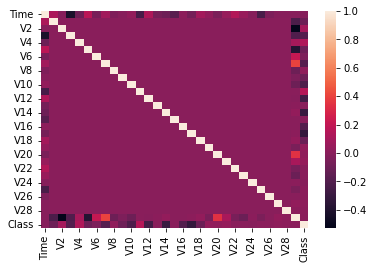

In [13]:
data.corr()

sns.heatmap(data.corr())

In [14]:
#### Correlations among data

Displaying absolute correlations above the threshold (0.5). Specify a positive "threshold" to limit the results further.


<AxesSubplot:title={'center':'Feature-correlation (spearman)'}>

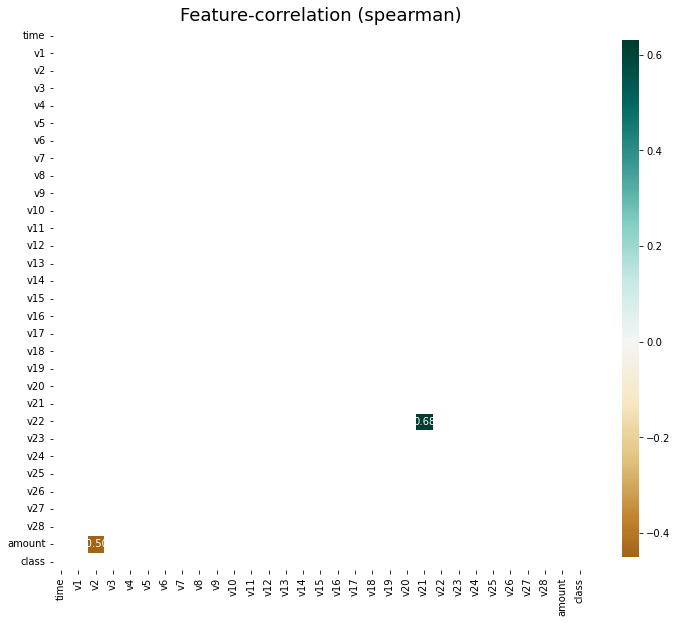

In [15]:
klib.corr_plot(cleaned_data,split='high',method='spearman',threshold=0.5)

There is no High linear Correlation among features, everything seems to be fine

## Plotting some plots to get some insights

### Amount Variable

C:\Users\varsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\varsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


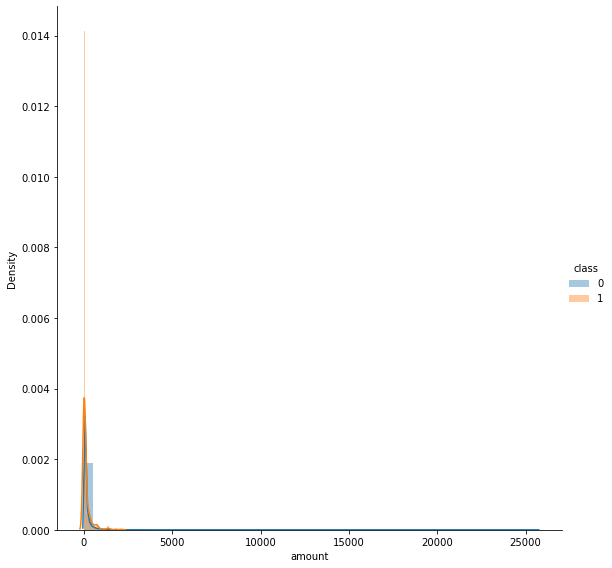

In [16]:
sns.FacetGrid(cleaned_data,hue='class',height=8).map(sns.distplot,"amount").add_legend()
plt.show()

<b> It seems we may have some outliers for amount so, let's try Box plots/Violin to see a better picture <b/>

<AxesSubplot:xlabel='class', ylabel='amount'>

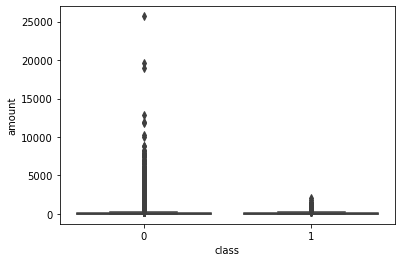

In [17]:
sns.boxplot(x='class',y='amount',data=cleaned_data)

In [18]:
cleaned_data['amount']

0         149.619995
1           2.690000
2         378.660004
3         123.500000
4          69.989998
             ...    
283721      0.770000
283722     24.790001
283723     67.879997
283724     10.000000
283725    217.000000
Name: amount, Length: 283726, dtype: float32

C:\Users\varsh\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


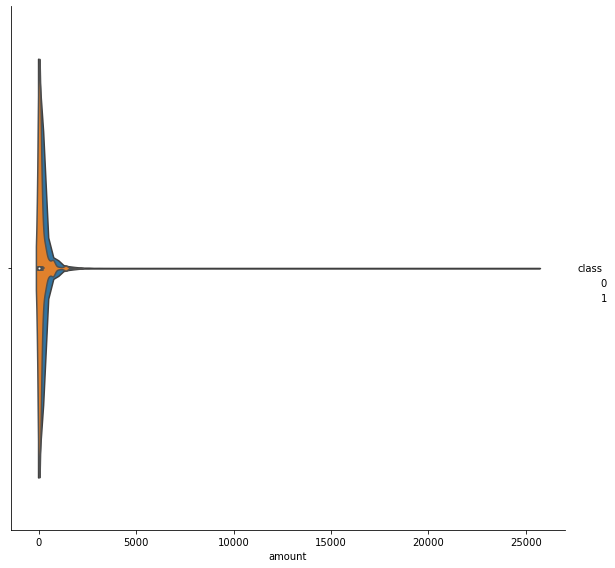

In [19]:
#sns.violinplot(x='class',y='amount',data=cleaned_data)

sns.FacetGrid(cleaned_data,hue='class',height=8).map(sns.violinplot,"amount").add_legend()

<b> Let's Calculate the 75 and 90 Percentiles for Amount for class 0 <b/>

In [20]:
amount = cleaned_data[cleaned_data['class'] == 0]['amount']
amount.describe()

count    283253.000000
mean         88.387161
std         250.324829
min           0.000000
25%           5.670000
50%          22.000000
75%          77.459999
max       25691.160156
Name: amount, dtype: float64

In [21]:
np.percentile(amount,20)

3.5799999237060547

<AxesSubplot:>

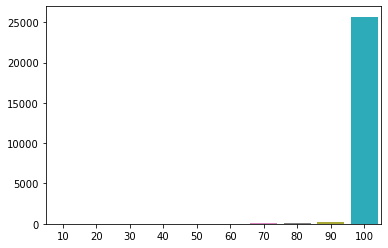

In [22]:
percentiles = [np.percentile(amount,q=q) for q in range(10,110,10)]

sns.barplot(x=list(range(10,110,10)),y=percentiles)

<b> Let's Zoom in between 90 to 100 percentiles <b/>

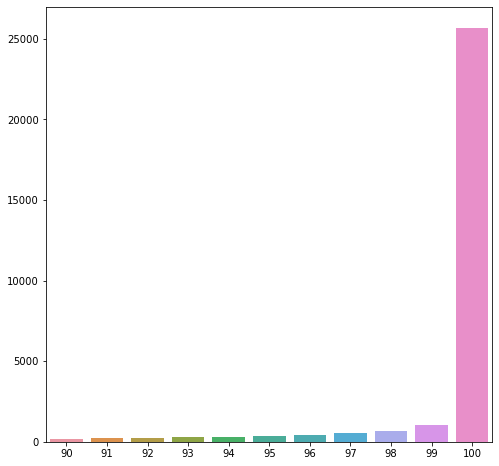

In [23]:
percentiles = [np.percentile(amount,q=q) for q in range(90,101)]

plt.figure(figsize=(8,8))
sns.barplot(x=list(range(90,101)),y=percentiles)
plt.show()

<b> Let's Zoom in between 99 to 100 percentiles <b/>

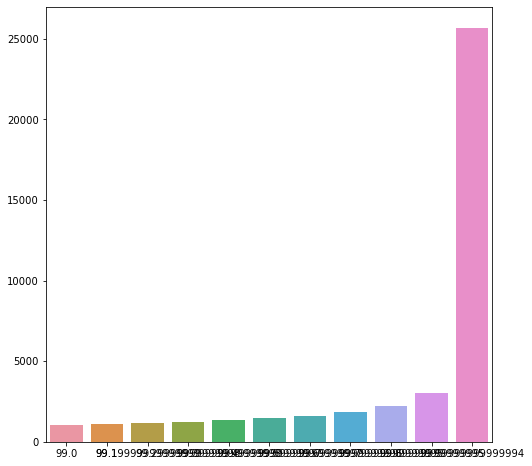

In [24]:
percentiles = [np.percentile(amount,q=q) for q in np.arange(99,100.1,0.1) ]

plt.figure(figsize=(8,8))
sns.barplot(x=np.arange(99,100.1,0.1),y=percentiles)
plt.show()

<b> percentage of rows lying between 99 to 100 <b/>

In [25]:
outlier_data = cleaned_data[(cleaned_data['amount']>=np.percentile(cleaned_data['amount'],99)) & (cleaned_data['amount']<=np.percentile(cleaned_data['amount'],100))]
cleaned_data = cleaned_data[~(cleaned_data['amount']>=np.percentile(cleaned_data['amount'],99)) & (cleaned_data['amount']<=np.percentile(cleaned_data['amount'],100))]

outlier_data

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
49,36.0,-1.004929,-0.985978,-0.038039,3.710061,-6.631951,5.122103,4.371691,-2.006867,-0.278736,...,1.393406,-0.381671,0.969719,0.019445,0.570923,0.333278,0.857373,-0.075538,1402.949951,0
87,59.0,-0.773293,-4.146007,-0.932038,0.027094,-1.698307,0.460188,0.737345,-0.314216,-0.842673,...,0.890978,0.026123,-1.134769,-0.654958,0.098386,-0.209150,-0.171709,0.208057,1142.020020,0
159,103.0,-6.093248,-12.114213,-5.694973,3.294389,-1.413792,4.776000,4.808426,-0.228197,-0.525896,...,2.228823,-2.264037,-3.553381,1.215279,-0.406073,-0.653385,-0.711222,0.672900,3828.040039,0
858,656.0,-1.789835,-5.835768,-1.472791,-0.851160,-2.433875,0.401415,1.354543,-0.288283,2.426889,...,1.081404,-0.178233,-1.635914,-0.645651,0.112930,-0.726724,-0.184806,0.296762,1602.989990,0
1020,775.0,-3.900810,-3.098370,-0.213428,-2.678434,-2.927576,0.735688,1.591471,-3.465433,1.812757,...,-1.357870,-0.097578,-4.020300,0.191246,-0.204492,-1.076721,1.072961,-0.188497,1528.900024,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282796,171943.0,0.087032,-2.727628,-3.215030,2.216197,-0.229633,-1.419572,2.553476,-0.987507,-0.614069,...,0.969833,0.738640,-1.082522,0.535977,0.474597,-0.330842,-0.235690,0.105630,1026.459961,0
283075,172199.0,-1.448606,-2.673922,-3.563343,-0.194096,0.007561,4.999177,4.136303,0.159725,-2.951736,...,0.644819,0.520282,2.202927,0.683422,0.446953,1.403290,-0.242420,0.221515,1088.040039,0
283168,172273.0,-9.030538,-11.112584,-16.233797,3.592021,-40.427727,23.917837,44.054462,-7.277778,-4.210637,...,-0.269048,0.988144,7.040028,0.347694,2.520869,2.342494,3.478175,-2.713136,10199.440430,0
283302,172397.0,-0.065120,-4.114668,-2.106854,-0.137339,-1.384530,0.239999,0.893833,-0.257922,1.145887,...,0.395868,-1.244969,-0.686403,-0.963878,-0.924685,0.210599,-0.253408,0.125687,1114.000000,0


In [26]:
cleaned_data.reset_index(drop=True,inplace=True)
cleaned_data

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280883,172786.0,-11.881118,10.071785,-9.834784,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0
280884,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790001,0
280885,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.879997,0
280886,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0


In [27]:
len(outlier_data)/len(data) * 100

0.9964642722966781

<b> 0.996 % of the data lies between 99 to 100 percentiles <b/>

<AxesSubplot:xlabel='class', ylabel='amount'>

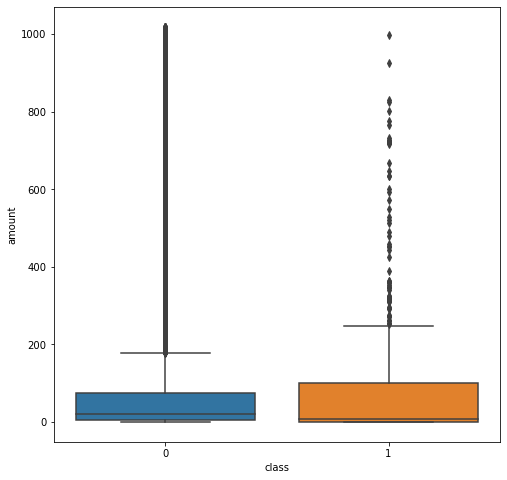

In [28]:
plt.figure(figsize=(8,8))
sns.boxplot(x='class',y='amount',data=cleaned_data)

C:\Users\varsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\varsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


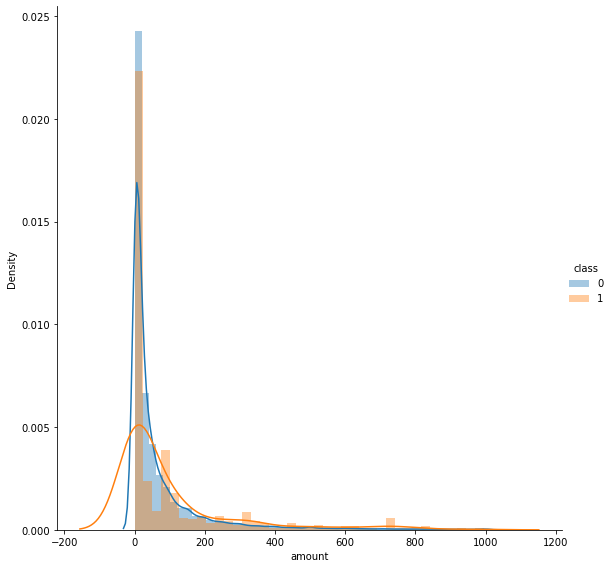

In [29]:
sns.FacetGrid(cleaned_data,hue='class',height=8).map(sns.distplot,"amount").add_legend()
plt.show()

<b> we can see it's heavily skewed towards right for both classes, however we have less data for class 1 so let's take a chance in keeping the skewed data.

Also the pdfs overlap so Amount on it's own is not a good feature to distinguish between the classes.

### Time variable

C:\Users\varsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\varsh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


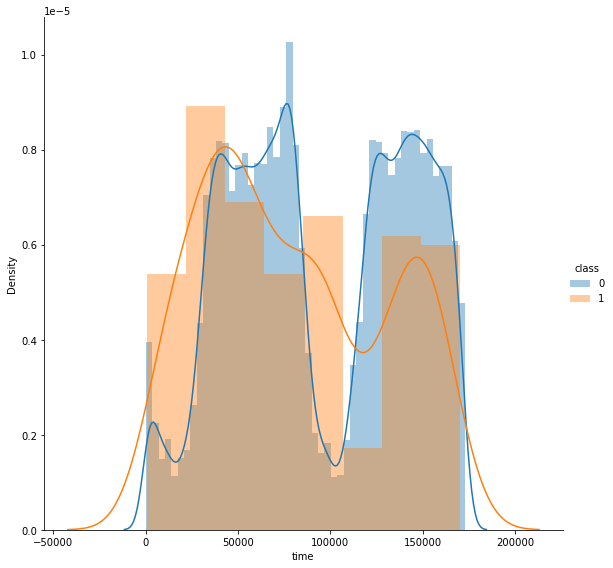

In [30]:
sns.FacetGrid(cleaned_data,hue='class',height=8).map(sns.distplot,'time').add_legend()

<AxesSubplot:xlabel='class', ylabel='time'>

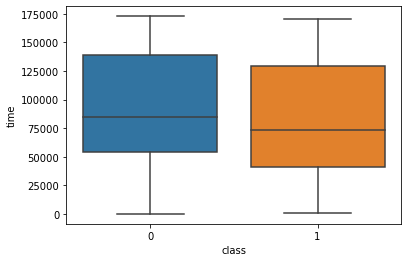

In [31]:
sns.boxplot(data=cleaned_data,x='class',y='time')

Well the Time feature, doesn't tell much except for certain duration, for now we'll leave as it is and see how much value it adds in combination with other features

### Let's try some pair plots in group of 3s to have a general view of other features v1 t0 v4

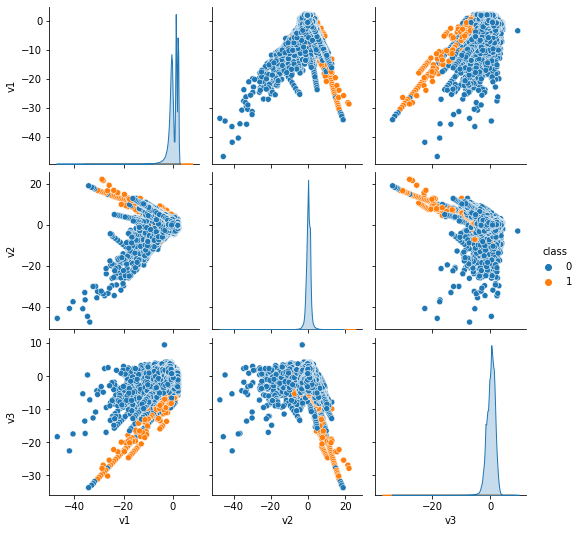

In [32]:
sns.pairplot(cleaned_data.loc[:,['v1','v2','v3','class']],hue='class')

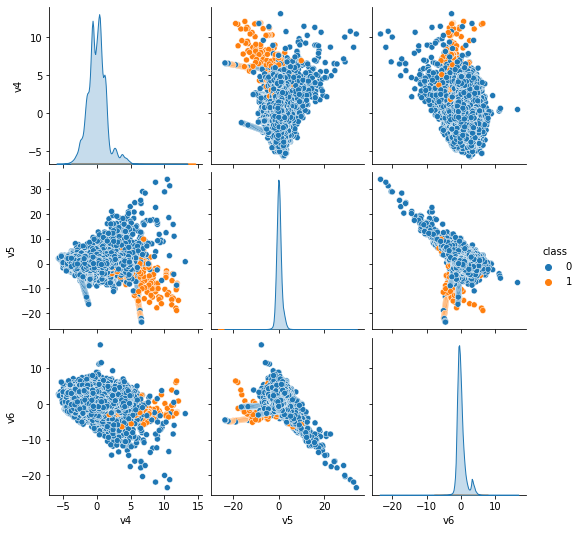

In [33]:
sns.pairplot(cleaned_data.loc[:,['v4','v5','v6','class']],hue='class')

## Train Test split

In [34]:
X = cleaned_data.drop(columns = ['class'])
y = cleaned_data['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .30,stratify=y)

In [35]:
(X_train.shape,y_train.shape)

((196621, 30), (196621,))

In [36]:
(X_test.shape,y_test.shape)

((84267, 30), (84267,))

In [37]:
y_train.value_counts()

0    196296
1       325
Name: class, dtype: int64

In [38]:
y_test.value_counts()

0    84128
1      139
Name: class, dtype: int64

In [39]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)

In [40]:
(X_train_scaled.shape,X_test_scaled.shape)

((196621, 30), (84267, 30))

## Model building

### Logistic regression 

In [41]:
lr = LogisticRegression()
lr.fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)

In [42]:
# precision
# TP / (TP + FP)
46 / (46 + 29)

0.6133333333333333

In [43]:
# Recall
# TP / (TP +FN)
46 / (46 + 47)

0.4946236559139785

In [44]:
# accuracy
# ( TP + TN ) / (TP + TN + FP + FN)
(46 + 56056) / (46 + 56056 + 29 + 47) 

0.9986471572501691

#### Function to plot pr curve and confusion matrix

In [45]:
def score(X_test,y_test,model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test,y_pred))
    ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['not fraud','fraud']).plot()
    plot_precision_recall_curve(model,X_test,y_test)
    

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84128
           1       0.87      0.71      0.78       139

    accuracy                           1.00     84267
   macro avg       0.93      0.86      0.89     84267
weighted avg       1.00      1.00      1.00     84267



C:\Users\varsh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


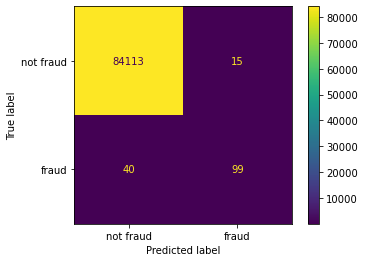

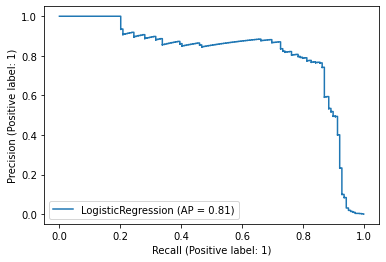

In [46]:
score(X_test_scaled,y_test,lr)

### Finding best threshold

In [52]:
def score_threshold(model,X_test,y_test,beta):
    
    result = {}
    
    pred_proba = model.predict_proba(X_test)[:,1]
    precisions,recalls,thresholds =  precision_recall_curve(y_test,pred_proba)
    #f1_scores = 2 * (precisions * recalls) / (precisions + recalls)
    f_beta_scores = (1 + beta**2) * (precisions * recalls) / ((beta**2 * precisions) + recalls)
    best_f_beta_score = max(f_beta_scores)
    ind = np.argmax(f_beta_scores)
    best_threshold = thresholds[ind]
    precision_t = precisions[ind]
    recall_t = recalls[ind]
    
    result['f_beta_score'] = best_f_beta_score
    result['threshold'] = best_threshold
    result['precision'] = precision_t
    result['recall']  = recall_t
    result['beta'] = beta
    
    return result
    

In [78]:
temp_rf = RandomForestClassifier(n_jobs = -1)
temp_rf.fit(X_train_scaled,y_train)
score_threshold(temp_rf,X_test_scaled,y_test,1.5)

{'f_beta_score': 0.905292479108635,
 'threshold': 0.33,
 'precision': 0.9191176470588235,
 'recall': 0.8992805755395683,
 'beta': 1.5}

In [79]:
score_threshold(temp_rf,X_test_scaled,y_test,1)

{'f_beta_score': 0.9138576779026217,
 'threshold': 0.5,
 'precision': 0.953125,
 'recall': 0.8776978417266187,
 'beta': 1}

In [80]:
score_threshold(temp_rf,X_test_scaled,y_test,1.7)

{'f_beta_score': 0.9042978557214854,
 'threshold': 0.33,
 'precision': 0.9191176470588235,
 'recall': 0.8992805755395683,
 'beta': 1.7}

In [81]:
score_threshold(temp_rf,X_test_scaled,y_test,2)

{'f_beta_score': 0.9031791907514449,
 'threshold': 0.33,
 'precision': 0.9191176470588235,
 'recall': 0.8992805755395683,
 'beta': 2}

In [54]:
score_threshold(lr,X_test_scaled,y_test,1)

{'f_beta_score': 0.8108108108108107,
 'threshold': 0.06837868457352016,
 'precision': 0.7643312101910829,
 'recall': 0.8633093525179856,
 'beta': 1}

In [55]:
score_threshold(lr,X_test_scaled,y_test,1.5)

{'f_beta_score': 0.8302288451303885,
 'threshold': 0.06837868457352016,
 'precision': 0.7643312101910829,
 'recall': 0.8633093525179856,
 'beta': 1.5}

In [56]:
score_threshold(lr,X_test_scaled,y_test,2)

{'f_beta_score': 0.8415147265077139,
 'threshold': 0.06837868457352016,
 'precision': 0.7643312101910829,
 'recall': 0.8633093525179856,
 'beta': 2}

In [57]:
score_threshold(lr,X_test_scaled,y_test,0.5)

{'f_beta_score': 0.8376511226252159,
 'threshold': 0.5559283579010412,
 'precision': 0.8818181818181818,
 'recall': 0.697841726618705,
 'beta': 0.5}

## Handling imbalance

### Using class weights

#### generating random weights

In [48]:
x = np.linspace(0,1,15)

In [48]:
x

array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       , 0.57142857, 0.64285714,
       0.71428571, 0.78571429, 0.85714286, 0.92857143, 1.        ])

In [49]:
# X and 1-x -->for ex. 0: 0.07142857142857142, 1: 0.9285714285714286

In [50]:
weights = []
for i,j in zip(x,1-x):
    d1 = {}
    d1[0] = i
    d1[1] = j
    
    weights.append(d1)

In [51]:
weights

[{0: 0.0, 1: 1.0},
 {0: 0.07142857142857142, 1: 0.9285714285714286},
 {0: 0.14285714285714285, 1: 0.8571428571428572},
 {0: 0.21428571428571427, 1: 0.7857142857142857},
 {0: 0.2857142857142857, 1: 0.7142857142857143},
 {0: 0.3571428571428571, 1: 0.6428571428571429},
 {0: 0.42857142857142855, 1: 0.5714285714285714},
 {0: 0.5, 1: 0.5},
 {0: 0.5714285714285714, 1: 0.4285714285714286},
 {0: 0.6428571428571428, 1: 0.3571428571428572},
 {0: 0.7142857142857142, 1: 0.2857142857142858},
 {0: 0.7857142857142857, 1: 0.2142857142857143},
 {0: 0.8571428571428571, 1: 0.1428571428571429},
 {0: 0.9285714285714285, 1: 0.07142857142857151},
 {0: 1.0, 1: 0.0}]

Fβ=(1+β2)⋅precision⋅recall(β2⋅precision)+recall

### Random forest

In [67]:
rf_score_weights = []

for weight in tqdm(weights):
    
    rf = RandomForestClassifier(class_weight=weight,n_jobs = -1)
    rf.fit(X_train_scaled,y_train)
    rf_score_weights.append(score_threshold(rf,X_test_scaled,y_test,1))


100%|██████████| 15/15 [26:15<00:00, 105.05s/it]


In [68]:
score_df = pd.DataFrame(rf_score_weights)

In [69]:
score_df

,f_beta_score,threshold,precision,recall,beta
0,0.003294,1.00,0.001650,1.000000,1
1,0.915129,0.37,0.939394,0.892086,1
2,0.917910,0.40,0.953488,0.884892,1
3,0.917293,0.55,0.960630,0.877698,1
4,0.915751,0.34,0.932836,0.899281,1
5,0.917293,0.56,0.960630,0.877698,1
6,0.913858,0.56,0.953125,0.877698,1
7,0.917293,0.53,0.960630,0.877698,1
8,0.918519,0.42,0.946565,0.892086,1
9,0.911111,0.43,0.938931,0.884892,1


In [71]:
score_df['f_beta_score'].max()

0.9213483146067416

### Random forest with different betas

In [60]:
rf_score_weights_1 = []
rf_score_weights_1_5 = []
rf_score_weights_1_7 = []

for weight in tqdm(weights):
    
    rf = RandomForestClassifier(class_weight=weight,n_jobs = -1)
    rf.fit(X_train_scaled,y_train)
    rf_score_weights_1.append(score_threshold(rf,X_test_scaled,y_test,1))
    rf_score_weights_1_5.append(score_threshold(rf,X_test_scaled,y_test,1.5))
    rf_score_weights_1_7.append(score_threshold(rf,X_test_scaled,y_test,1.7))
    
    

100%|██████████| 15/15 [19:24<00:00, 77.62s/it]


In [61]:
score_df_1 = pd.DataFrame(rf_score_weights_1)
score_df_1_5 = pd.DataFrame(rf_score_weights_1_5)
score_df_1_7 = pd.DataFrame(rf_score_weights_1_7)

In [65]:
score_df_1

,f_beta_score,threshold,precision,recall,beta
0,0.003294,1.00,0.001650,1.000000,1
1,0.917910,0.45,0.953488,0.884892,1
2,0.917910,0.40,0.953488,0.884892,1
3,0.913858,0.49,0.953125,0.877698,1
4,0.915751,0.31,0.932836,0.899281,1
5,0.914498,0.41,0.946154,0.884892,1
6,0.917293,0.58,0.960630,0.877698,1
7,0.916667,0.61,0.968000,0.870504,1
8,0.922509,0.41,0.946970,0.899281,1
9,0.915751,0.41,0.932836,0.899281,1


In [72]:
score_df_1['f_beta_score'].max()

0.9225092250922509

In [63]:
score_df_1_5

,f_beta_score,threshold,precision,recall,beta
0,0.005341,1.00,0.001650,1.000000,1.5
1,0.909345,0.31,0.932836,0.899281,1.5
2,0.909345,0.30,0.932836,0.899281,1.5
3,0.901276,0.24,0.905797,0.899281,1.5
4,0.909345,0.31,0.932836,0.899281,1.5
5,0.907314,0.36,0.925926,0.899281,1.5
6,0.909345,0.36,0.932836,0.899281,1.5
7,0.909345,0.41,0.932836,0.899281,1.5
8,0.913435,0.41,0.946970,0.899281,1.5
9,0.909345,0.41,0.932836,0.899281,1.5


In [73]:
score_df_1_5['f_beta_score'].max()

0.913434513771782

In [64]:
score_df_1_7

,f_beta_score,threshold,precision,recall,beta
0,0.006386,1.00,0.001650,1.000000,1.7
1,0.907674,0.31,0.932836,0.899281,1.7
2,0.907674,0.30,0.932836,0.899281,1.7
3,0.900947,0.24,0.905797,0.899281,1.7
4,0.907674,0.31,0.932836,0.899281,1.7
5,0.905983,0.36,0.925926,0.899281,1.7
6,0.907674,0.36,0.932836,0.899281,1.7
7,0.907674,0.41,0.932836,0.899281,1.7
8,0.911075,0.41,0.946970,0.899281,1.7
9,0.907674,0.41,0.932836,0.899281,1.7


In [86]:
score_df_1_7['f_beta_score'].max()

0.9110753030672089

In [83]:
weights

[{0: 0.0, 1: 1.0},
 {0: 0.07142857142857142, 1: 0.9285714285714286},
 {0: 0.14285714285714285, 1: 0.8571428571428572},
 {0: 0.21428571428571427, 1: 0.7857142857142857},
 {0: 0.2857142857142857, 1: 0.7142857142857143},
 {0: 0.3571428571428571, 1: 0.6428571428571429},
 {0: 0.42857142857142855, 1: 0.5714285714285714},
 {0: 0.5, 1: 0.5},
 {0: 0.5714285714285714, 1: 0.4285714285714286},
 {0: 0.6428571428571428, 1: 0.3571428571428572},
 {0: 0.7142857142857142, 1: 0.2857142857142858},
 {0: 0.7857142857142857, 1: 0.2142857142857143},
 {0: 0.8571428571428571, 1: 0.1428571428571429},
 {0: 0.9285714285714285, 1: 0.07142857142857151},
 {0: 1.0, 1: 0.0}]

In [97]:
weights[score_df_1_7[ score_df_1_7['f_beta_score'] == score_df_1_7['f_beta_score'].max()].index[0]]

{0: 0.5714285714285714, 1: 0.4285714285714286}

#### Conclusion: 0.911075	0.41	0.946970	0.899281	1.7
     

In [ ]:
#!pip install imblearn

## Under Sampling

### Manual approach 

In [106]:
train_temp_data = pd.DataFrame(X_train_scaled)

In [114]:
train_temp_data['y_train'] = y_train.reset_index(drop = True)

In [115]:
train_temp_data.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,y_train
0,-1.099131,0.597299,0.147431,0.176301,0.688319,-0.047941,-0.120278,0.067650,0.038297,-0.257057,...,0.158813,0.485946,-0.177036,0.049706,1.136436,-0.656216,0.065762,0.022456,-0.517390,0
1,1.376903,0.902650,-0.191438,-1.684947,0.760182,0.801645,-0.296435,0.928772,-0.288149,-0.443192,...,0.436160,0.746857,-0.500235,0.401724,1.046201,-0.945300,-0.207057,-0.148229,0.841794,0
2,-1.184028,0.704923,-0.544886,-0.001216,-1.078940,-0.656440,-0.374940,-0.300993,-0.215338,0.305879,...,-0.867855,-1.464667,-0.193985,-0.753497,1.300907,-1.569020,0.237209,0.104240,-0.192225,0
3,1.012102,-0.163251,0.688914,0.965671,1.936303,0.389590,0.902994,0.104275,0.323483,-0.968221,...,0.466412,1.142438,0.001115,1.112593,-0.972302,-0.247208,-0.584886,0.077509,-0.490183,0
4,-0.505882,0.812273,-0.735349,-0.033560,-1.213063,-0.761474,-0.015882,-0.937325,-0.037819,-1.872797,...,-0.331657,-0.446271,-0.256268,-1.420694,1.003587,-0.313603,0.063511,-0.003696,-0.455768,0


In [120]:
train_temp_data_0 = train_temp_data[train_temp_data['y_train'] == 0].sample(n = 325)

In [122]:
train_temp_data_1 = train_temp_data[train_temp_data['y_train'] == 1]

In [124]:
frames = [train_temp_data_0, train_temp_data_1]
under_sampling_temp_data = pd.concat(frames)

In [125]:
under_sampling_temp_data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,y_train
139048,-0.350967,-1.445180,1.615617,-0.521763,0.229384,0.031812,0.286054,-0.118454,0.547919,0.376496,...,0.295487,0.285885,-0.276626,-2.223981,-0.138408,-0.646956,-2.564602,0.727361,-0.494214,0
102585,-0.833307,0.605497,0.160211,0.174177,0.779409,-0.096024,-0.339160,0.168899,-0.112906,-0.060543,...,0.263305,0.851734,-0.318388,0.197937,1.371215,-0.398976,0.084276,0.064990,-0.409260,0


In [131]:
X_train_scaled = under_sampling_temp_data.drop(columns = ['y_train'])

In [132]:
y_train = under_sampling_temp_data['y_train']

In [133]:
rf_under = RandomForestClassifier()
rf_under.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [134]:
score_threshold(rf_under,X_test_scaled,y_test,1)

{'f_beta_score': 0.8368794326241136,
 'threshold': 0.95,
 'precision': 0.8251748251748252,
 'recall': 0.8489208633093526,
 'beta': 1}

In [135]:
score_threshold(rf_under,X_test_scaled,y_test,1.5)

{'f_beta_score': 0.841470104223807,
 'threshold': 0.95,
 'precision': 0.8251748251748252,
 'recall': 0.8489208633093526,
 'beta': 1.5}

In [136]:
score_threshold(rf_under,X_test_scaled,y_test,1.7)

{'f_beta_score': 0.8430405808094491,
 'threshold': 0.94,
 'precision': 0.7894736842105263,
 'recall': 0.8633093525179856,
 'beta': 1.7}

### Using RandomUnderSampler from imblearn

In [138]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(train_temp_data.drop(columns = ['y_train']),train_temp_data['y_train'])

In [139]:
X_res.shape

(650, 30)

In [140]:
y_res.shape

(650,)

In [141]:
rf_under_imb = RandomForestClassifier()
rf_under_imb.fit(X_res,y_res)

RandomForestClassifier()

In [142]:
score_threshold(rf_under,X_test_scaled,y_test,1)

{'f_beta_score': 0.8368794326241136,
 'threshold': 0.95,
 'precision': 0.8251748251748252,
 'recall': 0.8489208633093526,
 'beta': 1}

In [143]:
score_threshold(rf_under,X_test_scaled,y_test,1.5)

{'f_beta_score': 0.841470104223807,
 'threshold': 0.95,
 'precision': 0.8251748251748252,
 'recall': 0.8489208633093526,
 'beta': 1.5}

In [144]:
score_threshold(rf_under,X_test_scaled,y_test,1.7)

{'f_beta_score': 0.8430405808094491,
 'threshold': 0.94,
 'precision': 0.7894736842105263,
 'recall': 0.8633093525179856,
 'beta': 1.7}

#### Conclusion:

## Over sampling -- SMOTE

In [146]:
sm_over = SMOTE(random_state=42)
X_res_over, y_res_over = sm_over.fit_resample(train_temp_data.drop(columns = ['y_train']),train_temp_data['y_train'])

In [147]:
X_res_over.shape

(392592, 30)

In [148]:
y_res_over.shape

(392592,)

In [149]:
rf_over_imb = RandomForestClassifier()
rf_over_imb.fit(X_res_over,y_res_over)

RandomForestClassifier()

In [150]:
score_threshold(rf_over_imb,X_test_scaled,y_test,1)

{'f_beta_score': 0.9138576779026217,
 'threshold': 0.68,
 'precision': 0.953125,
 'recall': 0.8776978417266187,
 'beta': 1}

In [151]:
score_threshold(rf_over_imb,X_test_scaled,y_test,1.5)

{'f_beta_score': 0.8996029495178672,
 'threshold': 0.68,
 'precision': 0.953125,
 'recall': 0.8776978417266187,
 'beta': 1.5}

In [152]:
score_threshold(rf_over_imb,X_test_scaled,y_test,1.7)

{'f_beta_score': 0.8959241849313775,
 'threshold': 0.68,
 'precision': 0.953125,
 'recall': 0.8776978417266187,
 'beta': 1.7}

#### Conclusion:

## Final conclusion: